In [1]:
import matplotlib.pylab as plt
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import copy
from distribuciones import espirales_anidadas
from random import sample

In [2]:
neuronas_capa_int = [2,10,20,40]
lrate = 0.1
pmom  = 0.9
ndata = 600
ntest = 2000
nevaluaciones = 100
nepocas = 20

In [3]:
df = espirales_anidadas(ndata).drop(['r','tita'],axis=1)
y0 = df['clases']
x0 = df.drop(['clases'],axis = 1)

In [4]:
mask_validation = sample(list(np.arange(ndata)),120)
mask_train = np.delete(np.arange(ndata),mask_validation)

y_validation = y0.values[mask_validation]
x_validation = x0.values[mask_validation]

y_train = y0.values[mask_train]
x_train = x0.values[mask_train]

In [5]:
df_test = espirales_anidadas(ntest).drop(['r','tita'],axis=1)
y_test = df['clases']
x_test = df.drop(['clases'],axis = 1)

x_test = x_test.values
y_test = y_test.values

In [6]:
np.shape(x_test)

(600, 2)

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
def entrenar_red(evaluaciones,red,x_train,y_train,x_val,y_val,x_test,y_test):
    errores = []
    min_error = 1
    
    for i in range(evaluaciones):
        red.fit(x_train,y_train)
        y_pred = red.predict(x_val)
        error_val = sk.metrics.zero_one_loss(y_pred, y_val)
        #errores.append(error_valid)
        if error_val < min_error:
            min_error = error_val
            mejor_red = copy.deepcopy(red)
            
    pred_test = mejor_red.predict(x_test)
    error_test = sk.metrics.zero_one_loss(pred_test,y_test)

    pred_train = mejor_red.predict(x_train)
    error_train = sk.metrics.zero_one_loss(pred_train,y_train)

    
    return red, error_train, min_error, error_test

In [27]:
neuronas = 2

clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=nepocas) 


red, error_train, error_val, error_test = entrenar_red(evaluaciones = 10, red = clasif,  
                                                       x_train = x_train,y_train = y_train,
                                                       x_val = x_validation,y_val = y_validation,
                                                       x_test = x_test,y_test = y_test)

In [28]:
print(error_train, error_val, error_test)

0.43333333333333335 0.3833333333333333 0.42333333333333334


In [49]:
%%time

errores_train = []
errores_valid = []
errores_test = []

for neuronas in neuronas_capa_int:
    
    print(neuronas)
    clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=nepocas) 
    
    red, error_train, error_val, error_test = entrenar_red(evaluaciones = 1000, red = clasif, 
                                                       x_train = x_train,y_train = y_train,
                                                       x_val = x_validation,y_val = y_validation,
                                                       x_test = x_test,y_test = y_test)
    
    errores_train.append(error_train)
    errores_valid.append(error_val)
    errores_test.append(error_test)

2
10
20
40
CPU times: user 7min 33s, sys: 969 ms, total: 7min 34s
Wall time: 7min 32s


Text(0.5, 0, 'epocas')

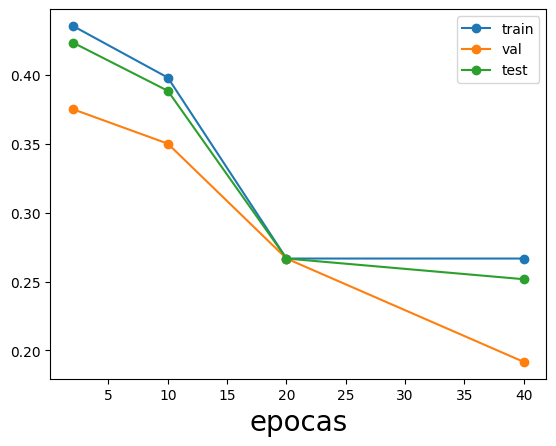

In [50]:
plt.plot(neuronas_capa_int,errores_train,label='train',marker='o')
plt.plot(neuronas_capa_int,errores_valid,label='val',marker='o')
plt.plot(neuronas_capa_int,errores_test,label='test',marker='o')
plt.legend()
plt.xlabel('epocas',size=20)

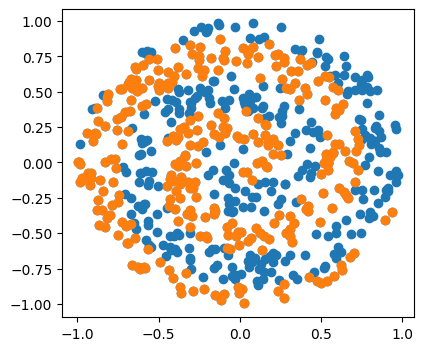

In [45]:
plt.figure(figsize=(10,4))

plt.subplot(121)
c0, = np.where(y_test==0)
plt.plot(x_test[:,0],x_test[:,1],ls='none',marker='o')
plt.plot(x_test[c0,0],x_test[c0,1],ls='none',marker='o')